# Explore highly co-expressed genes
In the previous [notebook](2_explore_data.ipynb) we observed that using 39 samples with 201 PAO1-specific genes, that the correlation of accessory-accessory genes is higher compared to the correlation of core-core and core-accessory genes.

Based on this finding, we want to know: *What can explain this difference in correlation distribution?*

This notebook performs a follow-up analysis. In particular this notebook performs a deeper examination of the correlation structure per group (core-core, core-accessory, accessory-accessory) by looking at the trends of the nearest neighbors (i.e. highly correlated genes) of each gene.

In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from functions import calculations

np.random.seed(123)

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Input
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

base_intermediate_dir = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "tmp")

core_gene_ids_file = os.path.join(
    base_intermediate_dir,
    "core_gene_ids.pickle")

acc_gene_ids_file = os.path.join(
    base_intermediate_dir,
    "acc_gene_ids.pickle")

real_all_corr_file = os.path.join(
    base_intermediate_dir,
    "real_all_corr.pickle")

shuffled_all_corr_file = os.path.join(
    base_intermediate_dir,
    "shuffled_all_corr.pickle")

# Import Pseudomonas operon annotations from ADAGE repo
# Original source of data is from DOOR
# https://github.com/greenelab/adage/blob/master/Genome_organization/operon_3.txt
# Operons containing at least 3 genes
operon_file = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "annotations",
    "DOOR_operon_3.txt")

# Examine highly co-expressed gene clusters
For each core gene we will:
1. Extract the number of genes that are highly co-expressed with it
2. Determine the ratio of co-expressed genes that are core vs accessory

Repeat this for each accessory gene

In [3]:
# Define threshold for highly co-expressed genes
coexpression_threshold = 0.9

### Co-expression patterns in real data

In [4]:
# Get co-expression patterns using real expression data
real_core_df, real_acc_df = calculations.get_coexpression_stats(real_all_corr_file,
                                                                operon_file,
                                                                core_gene_ids_file,
                                                                acc_gene_ids_file,
                                                                coexpression_threshold)

In [5]:
real_core_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0001,PA0001,0,0,0,0.0,0.0,0,0,0,0.0,0.0
PA0002,PA0002,7,7,0,1.0,0.0,7,7,0,1.0,0.0
PA0003,PA0003,1,1,0,1.0,0.0,1,1,0,1.0,0.0
PA0004,PA0004,8,8,0,1.0,0.0,8,8,0,1.0,0.0
PA0005,PA0005,0,0,0,0.0,0.0,0,0,0,0.0,0.0


In [6]:
real_acc_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0053,PA0053,22,6,16,0.272727,0.727273,22,6,16,0.272727,0.727273
PA0095,PA0095,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000
PA0100,PA0100,23,7,16,0.304348,0.695652,23,7,16,0.304348,0.695652
PA0135,PA0135,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000
PA0187,PA0187,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000


## Co-expression patterns in shuffled data

In [7]:
# Get co-expression patterns using shuffled expression data (control)
shuffled_core_df, shuffled_acc_df = calculations.get_coexpression_stats(shuffled_all_corr_file,
                                                                operon_file,
                                                                core_gene_ids_file,
                                                                acc_gene_ids_file,
                                                                coexpression_threshold)

shuffled_core_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0001,PA0001,0,0,0,0,0,0,0,0,0,0
PA0002,PA0002,0,0,0,0,0,0,0,0,0,0
PA0003,PA0003,0,0,0,0,0,0,0,0,0,0
PA0004,PA0004,0,0,0,0,0,0,0,0,0,0
PA0005,PA0005,0,0,0,0,0,0,0,0,0,0


In [8]:
shuffled_acc_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0053,PA0053,0,0,0,0,0,0,0,0,0,0
PA0095,PA0095,0,0,0,0,0,0,0,0,0,0
PA0100,PA0100,0,0,0,0,0,0,0,0,0,0
PA0135,PA0135,0,0,0,0,0,0,0,0,0,0
PA0187,PA0187,0,0,0,0,0,0,0,0,0,0


# Summary statistics

### Statistics of real data

In [9]:
# Print statistics about core genes
print('For a given CORE gene and using a threshold of {} to define co-expression: \n'.
     format(coexpression_threshold))
print('- There is a median of {} co-expressed  genes'.
      format(np.median(real_core_df['num_coexpressed_genes'])))
print('- Of the co-expressed genes, the median percent of core genes is {}% and accessory genes is {}%'.
      format(np.median(real_core_df['percent_coexpressed_core'])*100,
             np.median(real_core_df['percent_coexpressed_acc'])*100))

# Calculate the percent of co-expressed genes that are non co-operonic
real_percent_non_cooperonic_coexpressed_core_genes = (real_core_df['num_non_cooperonic_coexpressed_genes']/real_core_df['num_coexpressed_genes']).fillna(0)

print('- There is a median of {}% co-expressed genes that are NOT in a shared operon'.
      format(np.median(real_percent_non_cooperonic_coexpressed_core_genes)*100))
print('- Of the non-coperonic co-expressed genes, the median percent of core genes is {}% and accessory genes is {}%'.
      format(np.median(real_core_df['percent_non_cooperonic_coexpressed_core'])*100,
             np.median(real_core_df['percent_non_cooperonic_coexpressed_acc'])*100))

For a given CORE gene and using a threshold of 0.9 to define co-expression: 

- There is a median of 0.0 co-expressed  genes
- Of the co-expressed genes, the median percent of core genes is 0.0% and accessory genes is 0.0%
- There is a median of 0.0% co-expressed genes that are NOT in a shared operon
- Of the non-coperonic co-expressed genes, the median percent of core genes is 0.0% and accessory genes is 0.0%


In [10]:
# Print statistics about core genes
print('For a given ACCESSORY gene and using a threshold of {} to define co-expression: \n'.
     format(coexpression_threshold))
print('- There is a median of {} co-expressed  genes'.
      format(np.median(real_acc_df['num_coexpressed_genes'])))
print('- Of the co-expressed genes, the median percent of core genes is {}% and accessory genes is {}%'.
      format(np.median(real_acc_df['percent_coexpressed_core'])*100,
             np.median(real_acc_df['percent_coexpressed_acc'])*100))

# Calculate the percent of co-expressed genes that are non co-operonic
real_percent_non_cooperonic_coexpressed_acc_genes = (real_acc_df['num_non_cooperonic_coexpressed_genes']/real_acc_df['num_coexpressed_genes']).fillna(0)

print('- There is a median of {}% co-expressed genes that are NOT in a shared operon'.
      format(np.median(real_percent_non_cooperonic_coexpressed_acc_genes)*100))
print('- Of the non-coperonic co-expressed genes, the median percent of core genes is {}% and accessory genes is {}%'.
      format(np.median(real_acc_df['percent_non_cooperonic_coexpressed_core'])*100,
             np.median(real_acc_df['percent_non_cooperonic_coexpressed_acc'])*100))

For a given ACCESSORY gene and using a threshold of 0.9 to define co-expression: 

- There is a median of 0.0 co-expressed  genes
- Of the co-expressed genes, the median percent of core genes is 0.0% and accessory genes is 0.0%
- There is a median of 0.0% co-expressed genes that are NOT in a shared operon
- Of the non-coperonic co-expressed genes, the median percent of core genes is 0.0% and accessory genes is 0.0%


### Statistics of shuffled data

In [11]:
# Print statistics about core genes
print('For a given CORE gene and using a threshold of {} to define co-expression: \n'.
     format(coexpression_threshold))
print('- There is a median of {} co-expressed  genes'.
      format(np.median(shuffled_core_df['num_coexpressed_genes'])))
print('- Of the co-expressed genes, the median percent of core genes is {}% and accessory genes is {}%'.
      format(np.median(shuffled_core_df['percent_coexpressed_core'])*100,
             np.median(shuffled_core_df['percent_coexpressed_acc'])*100))

# Calculate the percent of co-expressed genes that are non co-operonic
shuffled_percent_non_cooperonic_coexpressed_core_genes = (shuffled_core_df['num_non_cooperonic_coexpressed_genes']/shuffled_core_df['num_coexpressed_genes']).fillna(0)

print('- There is a median of {}% co-expressed genes that are NOT in a shared operon'.
      format(np.median(shuffled_percent_non_cooperonic_coexpressed_core_genes)*100))
print('- Of the non-coperonic co-expressed genes, the median percent of core genes is {}% and accessory genes is {}%'.
      format(np.median(shuffled_core_df['percent_non_cooperonic_coexpressed_core'])*100,
             np.median(shuffled_core_df['percent_non_cooperonic_coexpressed_acc'])*100))

For a given CORE gene and using a threshold of 0.9 to define co-expression: 

- There is a median of 0.0 co-expressed  genes
- Of the co-expressed genes, the median percent of core genes is 0.0% and accessory genes is 0.0%
- There is a median of 0.0% co-expressed genes that are NOT in a shared operon
- Of the non-coperonic co-expressed genes, the median percent of core genes is 0.0% and accessory genes is 0.0%


In [12]:
# Print statistics about core genes
print('For a given ACCESSORY gene and using a threshold of {} to define co-expression: \n'.
     format(coexpression_threshold))
print('- There is a median of {} co-expressed  genes'.
      format(np.median(shuffled_acc_df['num_coexpressed_genes'])))
print('- Of the co-expressed genes, the median percent of core genes is {}% and accessory genes is {}%'.
      format(np.median(shuffled_acc_df['percent_coexpressed_core'])*100,
             np.median(shuffled_acc_df['percent_coexpressed_acc'])*100))

# Calculate the percent of co-expressed genes that are non co-operonic
shuffled_percent_non_cooperonic_coexpressed_acc_genes = (shuffled_acc_df['num_non_cooperonic_coexpressed_genes']/shuffled_acc_df['num_coexpressed_genes']).fillna(0)

print('- There is a median of {}% co-expressed genes that are NOT in a shared operon'.
      format(np.median(shuffled_percent_non_cooperonic_coexpressed_acc_genes)*100))
print('- Of the non-coperonic co-expressed genes, the median percent of core genes is {}% and accessory genes is {}%'.
      format(np.median(shuffled_acc_df['percent_non_cooperonic_coexpressed_core'])*100,
             np.median(shuffled_acc_df['percent_non_cooperonic_coexpressed_acc'])*100))

For a given ACCESSORY gene and using a threshold of 0.9 to define co-expression: 

- There is a median of 0.0 co-expressed  genes
- Of the co-expressed genes, the median percent of core genes is 0.0% and accessory genes is 0.0%
- There is a median of 0.0% co-expressed genes that are NOT in a shared operon
- Of the non-coperonic co-expressed genes, the median percent of core genes is 0.0% and accessory genes is 0.0%


# Plot trends in co-expression data

### Number of co-expressed genes

In [13]:
# Get bins using all data
hist, bins_num_coexpressed_real = np.histogram(np.concatenate([real_core_df['num_coexpressed_genes'].values,
                                                               real_acc_df['num_coexpressed_genes'].values]))

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

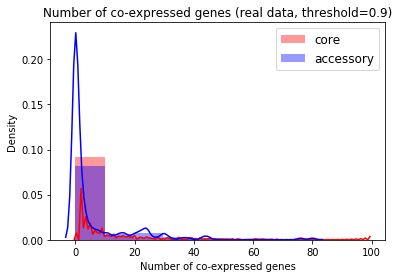

In [14]:
# Distribution of number of co-expressed genes in real data
sns.distplot(real_core_df['num_coexpressed_genes'].tolist(), 
             label='core',
             color='red',
             bins=bins_num_coexpressed_real)

sns.distplot(real_acc_df['num_coexpressed_genes'].tolist(), 
             label='accessory',
             color='blue',
             bins=bins_num_coexpressed_real)

plt.legend(prop={'size': 12})
plt.title('Number of co-expressed genes (real data, threshold={})'.format(coexpression_threshold))
plt.xlabel('Number of co-expressed genes')
plt.ylabel('Density')

In [15]:
# Get bins using all data
hist, bins_num_coexpressed_shuffled = np.histogram(np.concatenate([shuffled_core_df['num_coexpressed_genes'].values,
                                                                   shuffled_acc_df['num_coexpressed_genes'].values]))

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

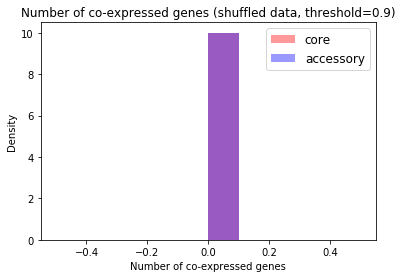

In [16]:
# Distribution of number of co-expressed genes in shuffled data
sns.distplot(shuffled_core_df['num_coexpressed_genes'].tolist(), 
             label='core',
             color='red',
             bins=bins_num_coexpressed_shuffled)

sns.distplot(shuffled_acc_df['num_coexpressed_genes'].tolist(), 
             label='accessory', 
             color='blue',
             bins=bins_num_coexpressed_shuffled)

plt.legend(prop={'size': 12})
plt.title('Number of co-expressed genes (shuffled data, threshold={})'.format(coexpression_threshold))
plt.xlabel('Number of co-expressed genes')
plt.ylabel('Density')

**Observation:**
* Most core and accessory genes are not co-expressed with other genes
* Core genes are co-expressed with a median of 18 genes
* Accessory genes are co-expressed with a median of 22 genes
* (control) All genes are independent, as expected, since we have destroyed relationships between genes when we shuffled
* If using a more strict definition...

### Percent of co-expressed genes that are not in the same operon

In [17]:
# Get bins using all data
hist, bins_num_percent_non_cooperonic_real = np.histogram(
    np.concatenate(
        [real_percent_non_cooperonic_coexpressed_core_genes,
         real_percent_non_cooperonic_coexpressed_acc_genes]
    )
)

Text(0, 0.5, 'Density')

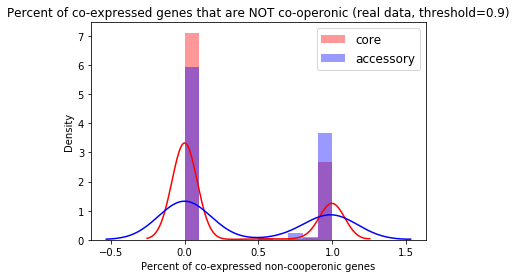

In [18]:
# Distribution of percent of co-expressed genes that are NOT co-operonic in real data
sns.distplot(real_percent_non_cooperonic_coexpressed_core_genes,
             label='core',
             color='red',
             bins=bins_num_percent_non_cooperonic_real)
sns.distplot(real_percent_non_cooperonic_coexpressed_acc_genes, 
             label='accessory',
             color='blue', 
             bins=bins_num_percent_non_cooperonic_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed genes that are NOT co-operonic (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes')
plt.ylabel('Density')

In [19]:
# Get bins using all data
hist, bins_num_percent_non_cooperonic_shuffled = np.histogram(
    np.concatenate([shuffled_percent_non_cooperonic_coexpressed_core_genes,
                    shuffled_percent_non_cooperonic_coexpressed_acc_genes]))

Text(0, 0.5, 'Density')

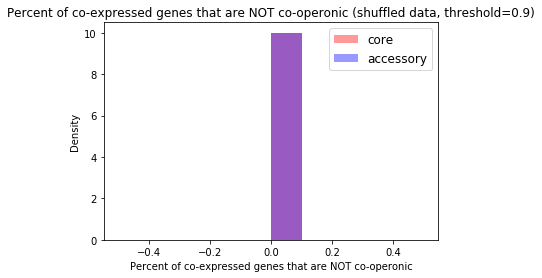

In [20]:
# Distribution of percent of co-expressed genes that are NOT co-operonic in shuffled data
sns.distplot(shuffled_percent_non_cooperonic_coexpressed_core_genes,
             label='core',
             color='red',
             bins=bins_num_percent_non_cooperonic_shuffled)
sns.distplot(shuffled_percent_non_cooperonic_coexpressed_acc_genes, 
             label='accessory',
             color='blue', 
             bins=bins_num_percent_non_cooperonic_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed genes that are NOT co-operonic (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed genes that are NOT co-operonic')
plt.ylabel('Density')

**Observations:**
* For majority of core genes, their co-expressed genes are not in the same operon. For example if core gene A is co-expressed with genes {X,Y,Z} and A is in operon {A,B,C} there are no intersecting genes. This is the case for most core genes
* For majority of accessory genes, their co-expressed genes are not in the same operon. 
* I would've expected more co-expressed genes to overlap with operons but need to read more about *P. aeruginosa* gene-gene interactions to get more of an intuition.
* (control) There are 0 non-cooperonic co-expressed genes since there are 0 co-expressed genes

### Core gene relationships
For a given core gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are core?
Similarly, for a given accessory gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are core? 

In [21]:
# Get bins using all data
hist, bins_core_real = np.histogram(np.concatenate([real_core_df['percent_non_cooperonic_coexpressed_core'].values,
                                                    real_acc_df['percent_non_cooperonic_coexpressed_core'].values]))

Text(0, 0.5, 'Density')

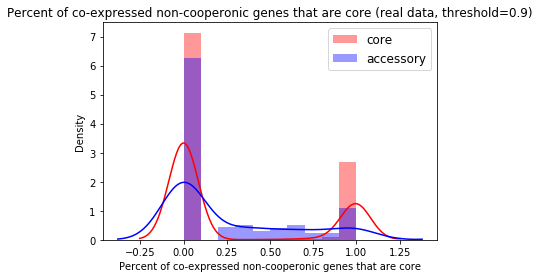

In [22]:
# Distribution plot for percent of core co-expressed genes in real data
sns.distplot(real_core_df['percent_non_cooperonic_coexpressed_core'].tolist(),
             label='core', 
             color='red',
             bins=bins_core_real)
sns.distplot(real_acc_df['percent_non_cooperonic_coexpressed_core'].tolist(),
             label='accessory',
             color='blue',
             bins=bins_core_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are core (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are core')
plt.ylabel('Density')

In [23]:
# Get bins using all data
hist, bins_core_shuffled = np.histogram(
    np.concatenate([shuffled_core_df['percent_non_cooperonic_coexpressed_core'].values,
                    shuffled_acc_df['percent_non_cooperonic_coexpressed_core'].values]))

Text(0, 0.5, 'Density')

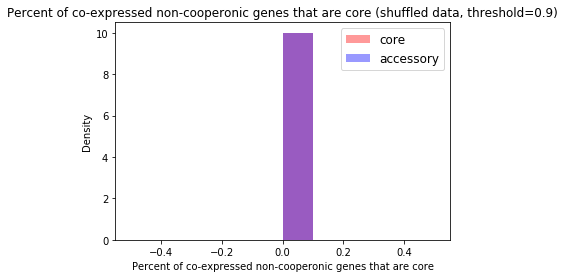

In [24]:
# Distribution plot for percent of core co-expressed genes in shuffled data
sns.distplot(shuffled_core_df['percent_non_cooperonic_coexpressed_core'].tolist(), 
             label='core', 
             color='red',
             bins=bins_core_shuffled)
sns.distplot(shuffled_acc_df['percent_non_cooperonic_coexpressed_core'].tolist(),
             label='accessory', 
             color='blue',
             bins=bins_core_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are core (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are core')
plt.ylabel('Density')

### Accessory gene relationships
For a given core gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are accessory?
Similarly, for a given accessory gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are accessory? 

In [25]:
# Get bins using all data
hist, bins_acc_real = np.histogram(np.concatenate([real_core_df['percent_non_cooperonic_coexpressed_acc'].values,
                                                   real_acc_df['percent_non_cooperonic_coexpressed_acc'].values]))

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

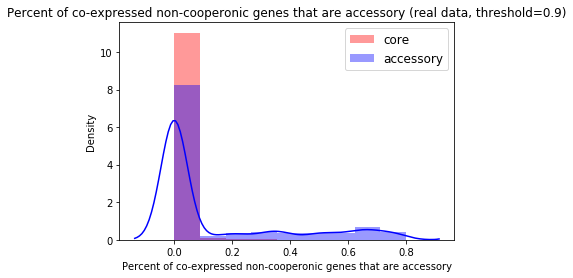

In [26]:
# Distribution plot for percent of accessory co-expressed genes in real data
sns.distplot(real_core_df['percent_non_cooperonic_coexpressed_acc'].tolist(),
             label='core', 
             color='red', 
             bins=bins_acc_real)

sns.distplot(real_acc_df['percent_non_cooperonic_coexpressed_acc'].tolist(),
             label='accessory',
             color='blue', 
             bins=bins_acc_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are accessory (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are accessory')
plt.ylabel('Density')

In [27]:
# Get bins using all data
hist, bins_acc_shuffled = np.histogram(
    np.concatenate([shuffled_core_df['percent_non_cooperonic_coexpressed_acc'].values,
                    shuffled_acc_df['percent_non_cooperonic_coexpressed_acc'].values]))

Text(0, 0.5, 'Density')

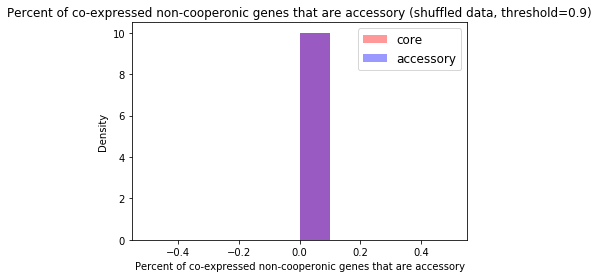

In [28]:
# Distribution plot for percent of accessory co-expressed genes in shuffled data
sns.distplot(shuffled_core_df['percent_non_cooperonic_coexpressed_acc'].tolist(), 
             label='core', 
             color='red',
             bins=bins_acc_shuffled)
sns.distplot(shuffled_acc_df['percent_non_cooperonic_coexpressed_acc'].tolist(), 
             label='accessory', 
             color='blue', 
             bins=bins_acc_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are accessory (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are accessory')
plt.ylabel('Density')

**Observation:**
* Core genes tend to be co-expressed with only other core genes
* Accessory genes tend to be co-expressed with some percent of core genes and accessory genes
* (control) There are no relationships between core-core, core-accessory, accessory-accessory

# Manually examine co-expressed and co-operonic genes

In [29]:
# Pull out genes that are co-expressed AND co-operonic
# Pull out genes that are co-expressed AND NOT co-operonic